# Project 2: Investigate a Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In the below document I will analyse movie data concerning about 10,000 movies collected from
The Movie Database (TMDb), including user ratings and revenue ([link](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1532469042115000)).

The data contains detailed information that can be used for in-depth analysis.
To keep this initial analysis simple, I will upfront skip the otherwise useful data such as: director, cast, production companies.
I will mostly stick to numeric data, such as user rating, budget, revenue.  
Financial data is considered given in USD.

Questions may involve:
* What factors are most closely correlated with financial success?
* Do better rated movies generate higher revenue?
* What are the characteristics by genre?
* What is the financial condition of movie industry over the years?

#### Workspace setup
I will be using Pandas and Matplotlib.<br>
In case they are needed, I am also importing NumPy and Seaborn.

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load and preview data
df = pd.read_csv("proj2_tmdb-movies.csv")
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [2]:
# list all columns
for col in df.columns:
    print(col)

id
imdb_id
popularity
budget
revenue
original_title
cast
homepage
director
tagline
keywords
overview
runtime
genres
production_companies
release_date
vote_count
vote_average
release_year
budget_adj
revenue_adj


<a id='wrangling'></a>
## Data Wrangling

### Initial Cleanup
Firstly, I remove columns outright unnecessary in this analysis.
Namely:
* _id_, _imdb_id_ - IDs not relevant here
* _budget_, _revenue_ - I will use columns adjusted to 2010 value of money instead (_budget_adj_, _revenue_adj_)
* _cast_, _homepage_, _director_, _tagline_, _keywords_, _overview_, _production_companies_, _release_date_ - Irrelevant additional information. 
<br>Cast, production companies or release date could provide useful insights if a more in-depth analysis was considered.
* _original_title_ could also be considered irrelevant. I will leave it for now to be able to name a specific movie if needed.

In [3]:
# drop specified columns and re-check
col_drop = ["id", "imdb_id", "budget", "revenue", "cast", "homepage", "director", "tagline", "keywords", "overview", "production_companies", "release_date"]
df.drop(col_drop, axis="columns", inplace=True)
df.head(1)

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09


### General Properties
Secondly, let's look at some basic properties of the dataset.

In [4]:
# number of columns and rows, column data types & null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   original_title  10866 non-null  object 
 2   runtime         10866 non-null  int64  
 3   genres          10843 non-null  object 
 4   vote_count      10866 non-null  int64  
 5   vote_average    10866 non-null  float64
 6   release_year    10866 non-null  int64  
 7   budget_adj      10866 non-null  float64
 8   revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 764.1+ KB


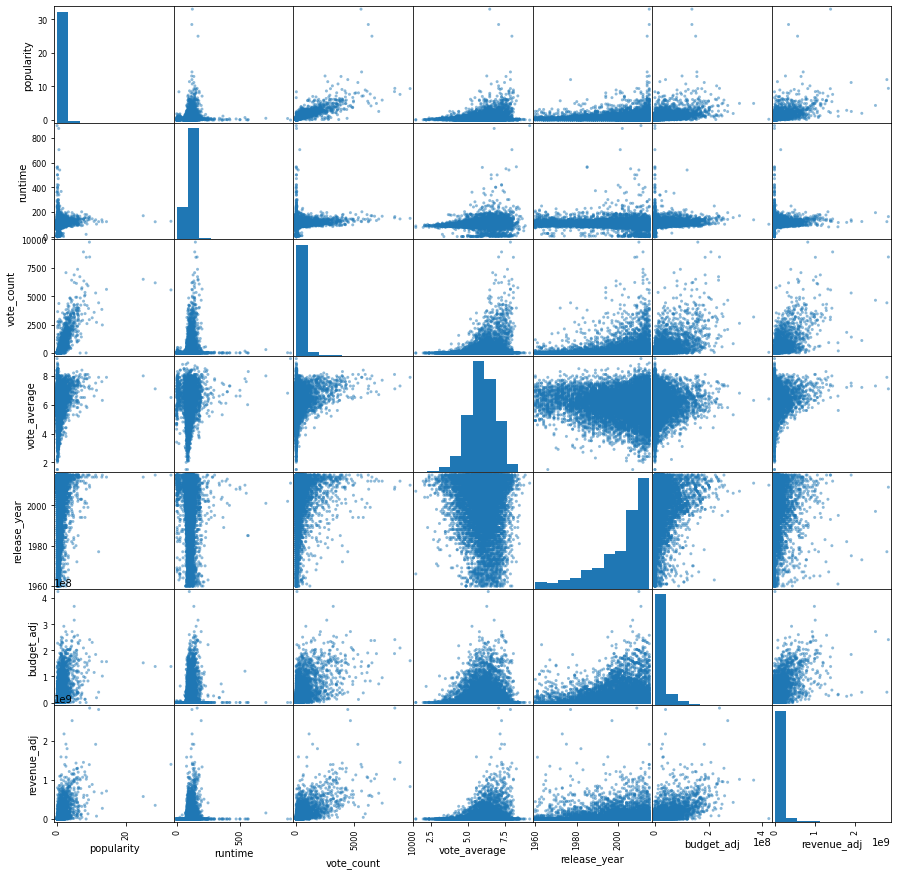

In [5]:
# basic plots to make initial observations
pd.plotting.scatter_matrix(df, figsize=(15,15));

#### What seems right:
* Data types of the remaining columns
* Few blank cells
* Column names are friendly (lower case + underscores)

#### Possible issues to fix:
* Null values - remove
* Budget and Revenue - can be converted to values in millions for increased readability
* Popularity and Vote count can be dropped - they are most relevant for currently released titles

### Data Cleaning
#### Dropping null-value rows
The number of null values is insignificant, therefore I remove entire rows containing null values.
Null values are found in _director_ and _genres_ columns.

In [6]:
# remove rows containing null values
df.query("genres == genres", inplace=True)

# re-check dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10843 non-null  float64
 1   original_title  10843 non-null  object 
 2   runtime         10843 non-null  int64  
 3   genres          10843 non-null  object 
 4   vote_count      10843 non-null  int64  
 5   vote_average    10843 non-null  float64
 6   release_year    10843 non-null  int64  
 7   budget_adj      10843 non-null  float64
 8   revenue_adj     10843 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 847.1+ KB


#### Dropping _popularity_ and _vote_count_ columns.

In [7]:
df.drop(["popularity", "vote_count"], axis=1, inplace=True)
for i, col in enumerate(df.columns) :
    print(i, col)

0 original_title
1 runtime
2 genres
3 vote_average
4 release_year
5 budget_adj
6 revenue_adj


#### Converting financials to millions for better readability

In [8]:
# divide figures by 1M
df.budget_adj = df.budget_adj / 1000000
df.revenue_adj = df.revenue_adj / 1000000

# round the figures, check the outcome
df = df.round({"budget_adj":1, "revenue_adj":1})
df.head(3)

,original_title,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,138.0,1392.4
1,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,138.0,348.2
2,Insurgent,119,Adventure|Science Fiction|Thriller,6.3,2015,101.2,271.6


#### Rename columns - for further ease of use

In [9]:
df.rename(columns={"original_title":"title", "vote_average":"vote", "release_year":"year","budget_adj":"budget", "revenue_adj":"revenue"}, inplace=True)
df.head(1)

,title,runtime,genres,vote,year,budget,revenue
0,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,138.0,1392.4


#### Genres - it may be useful to have a list of genres for later analysis

In [10]:
# Find all genres, this may be used later
genrelist = list()
for genrepack in df.genres.unique() :
    for genre in genrepack.split("|") :
        if genre in genrelist : continue
        else : genrelist.append(genre)

genrelist = sorted(genrelist)
print("Genre count:", len(genrelist))
print(genrelist)

Genre count: 20
['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


#### Cost to Income Ratio - additional column
It seems viable to add one more column showing how much each movie has made for a buck.

In [11]:
df["cir"] = df.budget / df.revenue
df.cir = df.cir.round(2)
df.head(3)

,title,runtime,genres,vote,year,budget,revenue,cir
0,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,138.0,1392.4,0.10
1,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,138.0,348.2,0.40
2,Insurgent,119,Adventure|Science Fiction|Thriller,6.3,2015,101.2,271.6,0.37


#### Verification

In [12]:
df.describe()

,runtime,vote,year,budget,revenue,cir
count,10843.000000,10843.000000,10843.000000,10843.000000,10843.000000,5995.000
mean,102.137508,5.973974,2001.315595,17.588232,51.473172,inf
std,31.293320,0.934260,12.813298,34.333527,144.766451,NaN
min,0.000000,1.500000,1960.000000,0.000000,0.000000,0.000
25%,90.000000,5.400000,1995.000000,0.000000,0.000000,0.160
50%,99.000000,6.000000,2006.000000,0.000000,0.000000,0.530
75%,111.000000,6.600000,2011.000000,20.900000,33.900000,6.635
max,900.000000,9.200000,2015.000000,425.000000,2827.100000,inf


#### Incomplete financials
After cleaning, unexpectedly the financial data seems incomplete.  
It appears around half rows contain 0 as value.  
It is highly unlikely that this many movies were produced on no budget or didn't make money at all.  
Therefore the issue seems to be that there was no financial data available for these movies, but instead of using non-value cells (NaN), someone decided to fill those with zeros.  
  
The financials were the fundamental aspect of the questions asked in the beginning, so ignoring the problem is not a solution.
#### Dropping rows?
Dropping half of the database seems harsh. It would significantly reduce the sample size and as such could greatly influence other results.  
I will therefore check whether we would get similar distribution for _vote_ and _year_ in reduced sample.

In [13]:
# define a function for a few repetitions
def hist_prop(xall, x, xlab, xxlab) :
    plt.hist(xall, bins=110, weights=np.ones(len(xall)) / len(xall), label="whole dataset")
    plt.hist(x, weights=np.ones(len(x)) / len(x), bins=110, alpha=0.7, label=xlab)
    plt.xlabel(xxlab)
    plt.ylabel("Occurences (proportion)")
    plt.legend()
    title = "Distribution of " + xxlab
    plt.title(title);

In [14]:
# assign query with zero-financials to a variable
zero_fin = df.query("revenue != 0 and budget != 0")

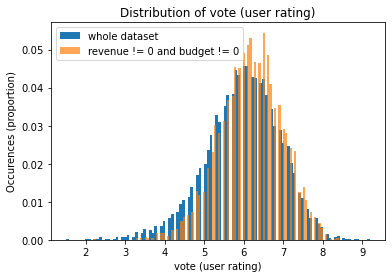

In [15]:
# call the function to plot vote distribution
hist_prop(df.vote, zero_fin.vote, "revenue != 0 and budget != 0", "vote (user rating)")

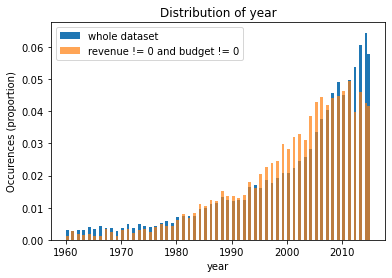

In [16]:
# call the function to plot year distribution
hist_prop(df.year, zero_fin.year, "revenue != 0 and budget != 0", "year")

#### Further cleaning
Above histograms show very similar distributions for user ratings (_vote_) and year of release year (_year_) in case all rows with incomplete financial data are dropped. Therefore, I am dropping this incomplete data below.

In [17]:
df = df.query("revenue != 0 and budget != 0")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3766 entries, 0 to 10848
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    3766 non-null   object 
 1   runtime  3766 non-null   int64  
 2   genres   3766 non-null   object 
 3   vote     3766 non-null   float64
 4   year     3766 non-null   int64  
 5   budget   3766 non-null   float64
 6   revenue  3766 non-null   float64
 7   cir      3766 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 264.8+ KB


In [18]:
# A peek at numeric data
df.describe()

,runtime,vote,year,budget,revenue,cir
count,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000
mean,109.463356,6.174084,2001.175252,45.103691,140.052576,2.447791
std,19.876554,0.792396,11.313337,44.895148,217.608517,14.936114
min,26.000000,2.200000,1960.000000,0.100000,0.100000,0.000000
25%,96.000000,5.700000,1995.000000,13.800000,20.200000,0.240000
50%,106.000000,6.200000,2004.000000,30.500000,64.200000,0.470000
75%,119.000000,6.700000,2010.000000,61.100000,166.375000,1.090000
max,338.000000,8.400000,2015.000000,425.000000,2827.100000,617.000000


Now it looks a lot better, although min value of 0 for cost to income ratio is quite abnormal. Let's check.

In [19]:
df.query("cir == 0").head(20)

,title,runtime,genres,vote,year,budget,revenue,cir
242,The Gallows,87,Horror|Thriller,5.0,2015,0.1,39.3,0.0
7057,Open Water,79,Drama|Thriller,5.3,2004,0.2,63.1,0.0
7178,Super Size Me,100,Documentary|Comedy|Drama,6.5,2004,0.1,33.0,0.0
7277,Pink Flamingos,93,Comedy,6.3,1972,0.1,31.3,0.0
7827,Mad Max,93,Adventure|Action|Thriller|Science Fiction,6.5,1979,1.2,300.5,0.0
9762,The Texas Chain Saw Massacre,83,Horror|Thriller,6.8,1974,0.4,136.5,0.0
10759,Halloween,91,Horror|Thriller,7.3,1978,1.0,234.0,0.0


It seems everything is in order. Displayed rows show movies that hit a mother lode and made tremendous amounts of money for a very modest investment.  
  
The dataset should finally be ready to work on it.

<a id='eda'></a>
## Exploratory Data Analysis

Let's look at the figures again:

In [20]:
df.describe()

,runtime,vote,year,budget,revenue,cir
count,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000
mean,109.463356,6.174084,2001.175252,45.103691,140.052576,2.447791
std,19.876554,0.792396,11.313337,44.895148,217.608517,14.936114
min,26.000000,2.200000,1960.000000,0.100000,0.100000,0.000000
25%,96.000000,5.700000,1995.000000,13.800000,20.200000,0.240000
50%,106.000000,6.200000,2004.000000,30.500000,64.200000,0.470000
75%,119.000000,6.700000,2010.000000,61.100000,166.375000,1.090000
max,338.000000,8.400000,2015.000000,425.000000,2827.100000,617.000000


### Question 1: Is there a correlation between Cost to Income Ratio (CIR) and any other variables?
(Lower CIR is better; CIR of 1 means cost was equal to income; CIR below 1 means income was higher than cost;)

Looking above, it can already be said that the CIR median of 0.47 means that roughly every second movie makes at least twice as much money as the original investment.

In [21]:
# How many movies at least returned the investment?
round(df.query("cir <= 1").count().cir / df.count().cir, 2)

0.73

Another observation - 73% of movies at least returned the investment.  
  
An illustration in the form of box plot:

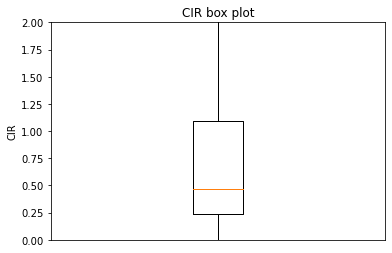

In [22]:
plt.boxplot(df.cir)
plt.ylim(0,2)
plt.xticks([])
plt.ylabel("CIR")
plt.title("CIR box plot");

#### A. CIR and user rating (_vote_)

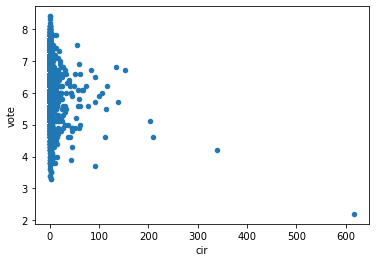

In [23]:
# a basic scatter plot to see if user rating and financial success are correlated
df.plot(x="cir", y="vote", kind="scatter");

Most data points are expected between 0.24 and 1.09 - let's zoom in a bit.

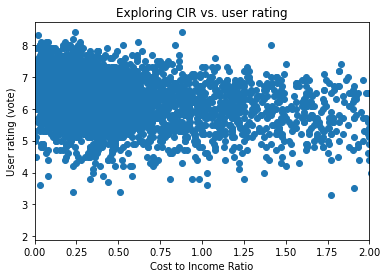

In [24]:
plt.scatter(df.cir, df.vote)
plt.xlim(0,2)
plt.xlabel("Cost to Income Ratio")
plt.ylabel("User rating (vote)")
plt.title("Exploring CIR vs. user rating");

The scatter plot doesn't indicate any particular correlation between user rating and CIR.

#### B. CIR and year of release

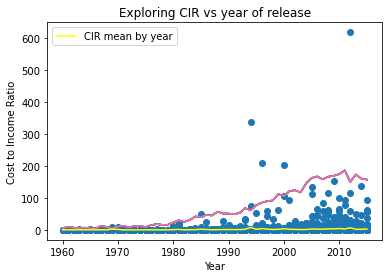

In [25]:
# Checking year vs. CIR
plt.scatter(df.year, df.cir)

# Adding lines to verify
plt.plot(df.groupby(df.year).count())
plt.plot(df.groupby(df.year).cir.mean(), color="yellow", label="CIR mean by year")
plt.legend()
plt.title("Exploring CIR vs year of release")
plt.xlabel("Year")
plt.ylabel("Cost to Income Ratio");

At first scatter plot might have suggested that newer movies had a higher chance of financial failure (high CIR).  
However, the increase in numbers of high-CIR movies over the years corresponds with the overall increase in movies produced (pink line).
Yellow line confirms it - the mean CIR remains steady over the years.

#### C. CIR and runtime

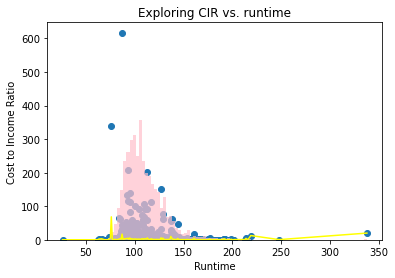

In [26]:
# Checking runtime vs. CIR
plt.scatter(df.runtime, df.cir)

# Verifying with other plots
plt.hist(df.runtime, bins=100, color="pink", alpha=0.7)
plt.plot(df.groupby(df.runtime).cir.mean(), color="yellow")
plt.xlabel("Runtime")
plt.ylabel("Cost to Income Ratio")
plt.title("Exploring CIR vs. runtime");

Runtime doesn't seem to influence CIR as well.

#### D. CIR by genre

In [27]:
# Sort genres by best (lowest) CIR
sort_list = list()
new_tup = tuple()

for genre in genrelist :
    v = df[df["genres"].str.contains(genre)].cir.median()
    new_tup = (v, genre)
    sort_list.append(new_tup)

sort_list = sorted(sort_list)
genrelist = []
for v, genre in sort_list :
    genrelist.append(genre)

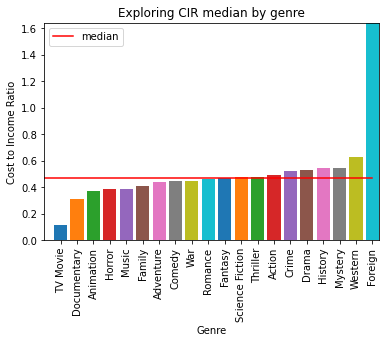

In [28]:
# Plot separate bar for each genre with its corresponding CIR
i = 1
ax = plt.subplot(111)
for genre in genrelist :
    df_temp = df[df["genres"].str.contains(genre)]
    ax.bar(i, df_temp.cir.median())
    i+=1
    ax.autoscale(tight=True)
x = len(genrelist)

# Plot a median
plt.plot([0, x], [df.cir.median(), df.cir.median()], color="red", label="median")

# Format the plot
plt.xticks(range(1, x+1), genrelist, rotation="vertical")
plt.xlabel("Genre")
plt.ylabel("Cost to Income Ratio")
plt.title("Exploring CIR median by genre")
plt.legend();

CIR median by genre can suggest a few genres easier or harder to profit upon, although most stick to the median for the whole dataset.

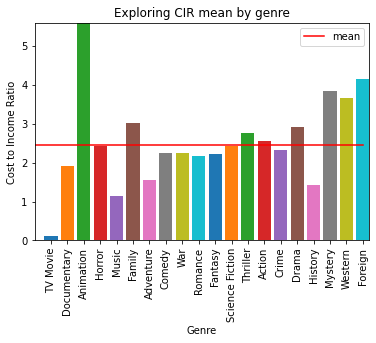

In [29]:
# Plot separate bar for each genre with its corresponding CIR
i = 1
ax = plt.subplot(111)
for genre in genrelist :
    df_temp = df[df["genres"].str.contains(genre)]
    ax.bar(i, df_temp.cir.mean())
    i+=1
    ax.autoscale(tight=True)
x = len(genrelist)

# Plot a median
plt.plot([0, x], [df.cir.mean(), df.cir.mean()], color="red", label="mean")

# Format the plot
plt.xticks(range(1, x+1), genrelist, rotation="vertical")
plt.xlabel("Genre")
plt.ylabel("Cost to Income Ratio")
plt.title("Exploring CIR mean by genre")
plt.legend();

CIR mean by genre generally shows how hard is to trust the means.  
Example: Animation, where more than 50% of movies achieve a solid 40% CIR, has a mean CIR of around 550%. That is, on average an Animation makes 5.5 times less money than it requires to produce.  
  
Although, when taken into account along with median, one could argue that the safest movies to make and profit are of TV Movie, Music, Adventure or History genres.

### Question 2: What is the all-time profit per genre?

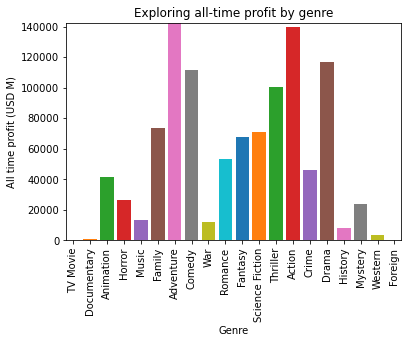

In [30]:
# Plot separate bar for each genre with its corresponding CIR
i = 1
ax = plt.subplot(111)
for genre in genrelist :
    df_temp = df[df["genres"].str.contains(genre)]
    profit = df_temp.revenue.sum() - df_temp.budget.sum()
    ax.bar(i, profit)
    i+=1
    ax.autoscale(tight=True)
x = len(genrelist)

# Format the plot
plt.xticks(range(1, x+1), genrelist, rotation="vertical")
plt.xlabel("Genre")
plt.ylabel("All time profit (USD M)")
plt.title("Exploring all-time profit by genre");

Certainly now it becomes more understandable why the market is not flooded with the genres picked in Question 1 as safe investment. As much as those were safe, the above plot points out the most profitable genres since 1960.
Interesting to see if this corresponds with the numbers of movies made by each genre.

### Question 3: Is the all-time profit correlated to user rating (_vote_) by genre?

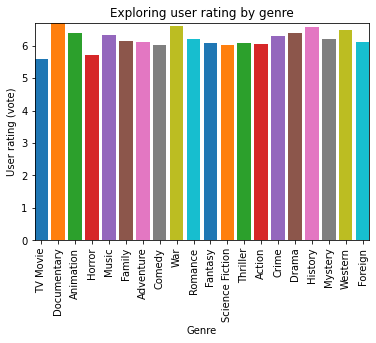

In [31]:
# Plot separate bar for each genre with its corresponding CIR
i = 1
ax = plt.subplot(111)
for genre in genrelist :
    df_temp = df[df["genres"].str.contains(genre)]
    profit = df_temp.revenue.sum() - df_temp.budget.sum()
    ax.bar(i, df_temp.vote.mean())
    i+=1
    ax.autoscale(tight=True)
x = len(genrelist)

# Format the plot
plt.xticks(range(1, x+1), genrelist, rotation="vertical")
plt.xlabel("Genre")
plt.ylabel("User rating (vote)")
plt.title("Exploring user rating by genre");

Again, even when broken down to genres, the more profitable ones are not necesarilly better rated.  
The differences are slight in general.

### Question 4: What is the financial condition of movie industry over the years?

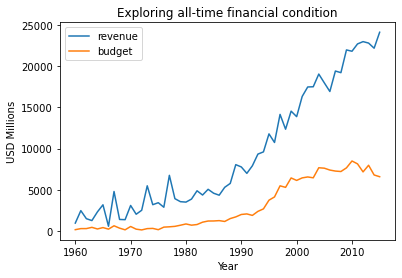

In [32]:
plt.plot(df.groupby(df.year).revenue.sum(), label="revenue")
plt.plot(df.groupby(df.year).budget.sum(), label="budget")
plt.legend()
plt.xlabel("Year")
plt.ylabel("USD Millions")
plt.title("Exploring all-time financial condition");

Overall, the movie industry has grown considerably to USD 25 Billion a year in revenue.  
The space between the two lines demonstrates the ever-growing total profit.

<a id='conclusions'></a>
## Conclusions



#### Dataset
The dataset turned out to be less complete than initially observed, however the remaining data seemed coherent.  
It was only partially explored here, with still a lot to uncover if so required.
#### Questions
##### Is there a correlation between Cost to Income Ratio (CIR) and any other variables?
No, there is no strong correlation between CIR and any other explored variable.
##### What is the all-time profit per genre?
Interestingly, all-time profit per genre does not at all correspond to genres with best CIR median or mean.
##### Is the all-time profit correlated to user rating (vote) by genre?
No. On genre level user ratings don't seem to influence profits.
##### What is the financial condition of movie industry over the years?
The industry is growing fast. In the years 2000-2015 it even achieved considerable growth in revenue despite level yearly budget.  
Yearly profits have exceeded USD 15 Billion and the yearly revenue has reached USD 25 Billion.
Moreover, the dataset's budget and revenue figures were adjusted to account for inflation.
With that in mind, it's impressive how movie industry has grown since 1960 and how profitable it has become.
#### Future questions
This analysis didn't find out the crucial factors for movie's financial success.
Therefore, this is still an open question.  
Suggestions for further digging include checking the influence of specific actors in the cast, a director, a production studio.  
It might also prove useful to analyse data broken into smaller chunks - for example what separates top 25% from bottom 25% of the most financially successful movies.

### # Left out

In [33]:
# Build a new dataframe for exploration by genre - should have done this before plotting.
cir_mean = list()
cir_median = list()
profit = list()
vote = list()

for genre in genrelist :
    new_cir_median = df[df["genres"].str.contains(genre)].cir.median()
    new_cir_mean = df[df["genres"].str.contains(genre)].cir.mean()
    new_profit = df[df["genres"].str.contains(genre)].revenue.sum() - df_temp.budget.sum()
    new_vote = df[df["genres"].str.contains(genre)].vote.mean()
    cir_median.append(round(new_cir_median,2))
    cir_mean.append(round(new_cir_mean,2))
    profit.append(int(new_profit))
    vote.append(round(new_vote, 2))

d = {"genre":genrelist, "cir_median":cir_median, "cir_mean":cir_mean, "profit":profit, "vote":vote}
df_gen = pd.DataFrame(data=d)

df_gen.head()

,genre,cir_median,cir_mean,profit,vote
0,TV Movie,0.12,0.12,-109,5.60
1,Documentary,0.32,1.91,695,6.70
2,Animation,0.37,5.59,58314,6.38
3,Horror,0.39,2.42,36970,5.72
4,Music,0.39,1.15,18133,6.31
